Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

Importing the necessary dataset, in this case the dataset concerned with Country Togo.

In [72]:
data_frame = pd.read_csv(r'sierraleone-bumbuna.csv')

Brief description about the dataset. This includes the shape, head and tail, data types and a general overview of the dataset. Starting from the shape of the data i am going to proceed respectively.

In [73]:
# Understand the shape of the distribution.
data_frame.shape

(525600, 19)

In [74]:
# Overview of the varbiables
data_frame.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0  

In [41]:
# List of each column in the dataset.
data_frame.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [42]:
# View of the data types of each column.
data_frame.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [75]:
# A general description of the dataset.
data_frame.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0

# Data preparation and cleaning stage

Out of the given 19 metrics in the dataset i have chosen to focus on 10 metrics as they are the most relevant metrics for our analysis and ultimately business objectives.The key columns(KPIs) that i have considered are:

1.GHI(W/m2): is a metric which indicates the total sunlight that was recieved on a surface. I consider this metric very significant to the analysis since it directly indicates optimal solar panel locations with immense potential for generating solar energy.

2.DNI(W/m2): This metric indicates areas with low interference by clouds and atmospheric pressure.Areas having high DNI values are ideal for installing solar panels.

3.DHI(W/m2): This metric aids in assessing solar potential even in areas with cloud cover or atmospheric scattering. It shows overall sunlight availability.

4.Tamb(°C): The temprature of air is crucial and has an immmense effect on the efficiency of solar panels because extreme temprature resuces their performance. So, this metrics helps us in selecting areas with optimal temprature ranges.

5.RH(% - Relative Humidity): This metric indicates humidity levels which is a key factor in the performance of solar panels. This is because in areas with high humidity it leads to decreased effectiveness due to condensation.

6.WS(m/s) and WSgust(m/s): This metric helps us assess and locate areas with lower wind speed and gust as these areas are ideal because they can support solar installations without excessive damage.

7.Precipitation(mm/min): This metric helps us in selecting drier areas which are optimal for loacting solar panels. This is becasue high precipitation goes hand in hand with reduced sunlight and increased maintenance cost.

8.TModa(°C) and TModb(°C): This metrics are key for the fact that they indicate the performance of the sensors in different environments and the condition inturn affecting the solar measurements are tracked.

9.WSstdev: The standard deviation of wind speed is a useful tool for calculating the variations in wind speed over time. High variability may be a sign of erratic wind conditions, which could affect how well solar panels function, particularly in terms of upkeep and durability.

In general, my justifications for choosing the above metrics are summarized below: -Sunlight Exposure(GHI, DNI and DHI) -Temprature(Tamb) -Humidity and Precipitation(RH, Precipitation) -Wind factors(WS and WSgust)

In the next stages i am going to continue with my prior basic exploration and analysis with only these 11 KPIs are going to be used for the comparison to select optimal areas to install solar panels. So, i am going to drop or subset the metrics that are irrelevant to the main analysis. I am going to use subseting sue to the reason that maybe i want to look at the other metrics in the end.

In [44]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = data_frame[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [45]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [76]:
# Overview of the data types
df.dtypes

GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
Cleaning           int64
WD               float64
Precipitation    float64
TModA            float64
TModB            float64
WD_rad           float64
dtype: object

In [47]:
# The time stamp shouldn't be an object so i am going to convert it to a datetime coulmn.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [48]:
# look for missing values.
df.isna().sum()
# All our metrics have no missing values.

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
Cleaning         0
WD               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [49]:
# Look for duplicated values.
df.loc[df.duplicated()]
# None of our values are duplicated.

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, Cleaning, WD, Precipitation, TModA, TModB]
Index: []

## Descriptive statistics
First we are going to present a summary statistics.

In [50]:
# Summary statistics
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50%        -0.100000       3.600000       3.400000      25.300000   
75%       224.700000     359.500000     345.400000      29.400000   
max       892.000000    1507.000000    1473.000000      39.900000   
std       158.946032     300.896893     288.889073       4.398605   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       79.448857       1.146113       1.691606       0.363823   
min         9.900000       0.000000       0.000000       0.000000   
25%        68.700000       0.000000       0.000000       0.000000   
50%        85.400000       0.800000       1.600000       0.400000   
75%        96.700000       2.000000       2.600000       0.600000   
max       100.000000      19.200000      23.900000       4.100000   
std        20.520775       1.239248       1.617053       0.295000   

            Cleaning             WD  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        0.000967     133.044668       0.004806      32.504263   
min         0.000000       0.000000       0.000000      10.700000   
25%         0.000000       0.000000       0.000000      23.500000   
50%         0.000000     161.500000       0.000000      26.600000   
75%         0.000000     234.100000       0.000000      40.900000   
max         1.000000     360.000000       2.400000      72.800000   
std         0.031074     114.284792       0.047556      12.434899   

               TModB  
count  525600.000000  
mean       32.593091  
min        11.100000  
25%        23.800000  
50%        26.900000  
75%        41.300000  
max        70.400000  
std        12.009161

After having a brief overview of the descriptive statistics we check for the existence of outliers. It can be implemented using two ways(IQR method and the Z-score method). I have chosen the Z-score method for the sake of convenience and due to the short deadline.

In [60]:
# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df.drop('Timestamp', axis=1).apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each column in the DataFrame
for column in benin_df_numeric.columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 6766
Number of outliers in DNI: 14611
Number of outliers in DHI: 2558
Number of outliers in ModA: 6279
Number of outliers in ModB: 6532
Number of outliers in Tamb: 125
Number of outliers in RH: 2862
Number of outliers in WS: 2091
Number of outliers in WSgust: 1645
Number of outliers in WSstdev: 0
Number of outliers in Cleaning: 0
Number of outliers in WD: 0
Number of outliers in Precipitation: 25764
Number of outliers in TModA: 1639
Number of outliers in TModB: 337
Number of remaining outliers after replacement: 58234


After the first attempt there are some outliers still left 
in some columns so in the next line of code we try to remove these remaining outliers.

In [61]:
# Selected columns for outlier removal
selected_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WD']

# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each selected column in the DataFrame
for column in selected_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")


Number of outliers in GHI: 6306
Number of outliers in DNI: 19395
Number of outliers in DHI: 1364
Number of outliers in ModA: 7832
Number of outliers in ModB: 7867
Number of outliers in WD: 0
Number of remaining outliers after replacement: 33110


In the next line of code we are going to change on the values after removing the outliers.

In [63]:
# Statistical check for outliers using the summary statistics.
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     139.912062      48.083057   
min              2021-10-30 00:01:00     -15.900000      -4.300000   
25%              2022-01-29 06:00:45      -2.200000      -0.200000   
50%              2022-04-30 12:00:30       6.000000      -0.100000   
75%              2022-07-30 18:00:15     185.900000      48.200000   
max              2022-10-30 00:00:00     823.000000     479.200000   
std                              NaN     211.353237     103.579485   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       97.448304     142.359087     135.764525      25.968103   
min       -16.700000       0.000000       0.000000      14.100000   
25%        -3.400000       0.000000       0.000000      23.200000   
50%         8.000000       9.700000       9.100000      25.600000   
75%       166.600000     185.807605     177.993060      28.200000   
max       516.200000     838.100000     799.400000      37.900000   
std       137.534281     210.926353     201.030169       3.982337   

                  RH             WS         WSgust        WSstdev  Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000  525600.0   
mean       81.250550       1.007574       1.502739       0.335273       0.0   
min        27.000000       0.000000       0.000000       0.000000       0.0   
25%        73.300000       0.000000       0.000000       0.000000       0.0   
50%        83.800000       0.900000       1.516039       0.400000       0.0   
75%        96.200000       1.700000       2.400000       0.500000       0.0   
max       100.000000       4.100000       5.400000       1.100000       0.0   
std        17.493151       1.031612       1.346584       0.261160       0.0   

                  WD  Precipitation          TModA          TModB  
count  525600.000000  525600.000000  525600.000000  525600.000000  
mean      127.326987       0.000004      30.932432      31.201954  
min         0.000000       0.000000      11.300000      11.600000  
25%         0.000000       0.000000      23.600000      23.900000  
50%       130.631600       0.000000      27.200000      27.500000  
75%       223.700000       0.000000      35.300000      35.700000  
max       360.000000       0.000080      62.700000      62.100000  
std       108.493842       0.000018      10.401079      10.280236

Several intriguing trends in the environmental and meteorological conditions of the region are revealed by the summary statistics offered for Sierra Leone:

#### The availability of solar resources:
is moderate to high, with DHI being the predominant component, according to the mean values for Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI). Significant variability in solar radiation is suggested by the broad range between the minimum and highest values, which may be caused by air conditions and cloud cover, among other things.
#### Temperature and Humidity:
A tropical environment with some temperature changes is suggested by the mean ambient temperature (Tamb), which is approximately 26°C with a range of 14.1°C to 37.9°C. With a mean of 81.25% and a large range from 27% to 100%, the relative humidity (RH) emphasizes Sierra Leone's constantly humid environment.
#### Features of the Wind: 
With a maximum gust speed of 5.4 m/s, the mean wind speed (WS) is 1.01 m/s. With a mean of 0.34, the wind speed standard deviation (WSstdev) indicates substantial variability in wind conditions. These wind patterns might have an impact on local wind energy development and other renewable energy projects.
#### Other Parameters: 
Module temperatures (ModA and ModB) are included in the data, which might be helpful in assessing how well Sierra Leone's solar energy systems are working. Despite being extremely low on average, the precipitation observations can be important for managing water resources and agricultural practices.




# Analysis
## Time series analysis

After removing the outliers and being done with the data cleaning and basic understanding stages let's proceed to the analysis part. We start by conducting a time series analysis to show trends by days and months.we proceed with the time series analysis by using line graphs of the key metircs(variables mentioned).

In [77]:
# Overview of the relevant columns
print(df.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA', 'TModB',
       'WD_rad'],
      dtype='object')


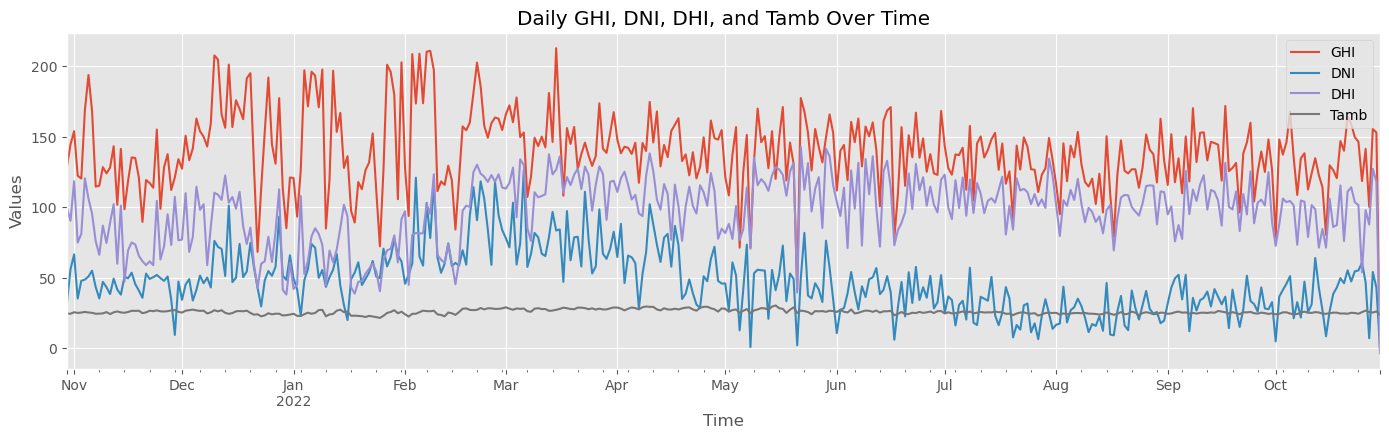

In [65]:
# Set 'Timestamp' as the index for easier time series plotting
df.set_index('Timestamp', inplace=True)

# Resample the data by day or month to observe patterns (optional: you can resample by hour as well)
df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()

In the next line of code we are going to evaluate the impact of cleaning on the two sensors(ModA and ModB) by using the cleaning column.

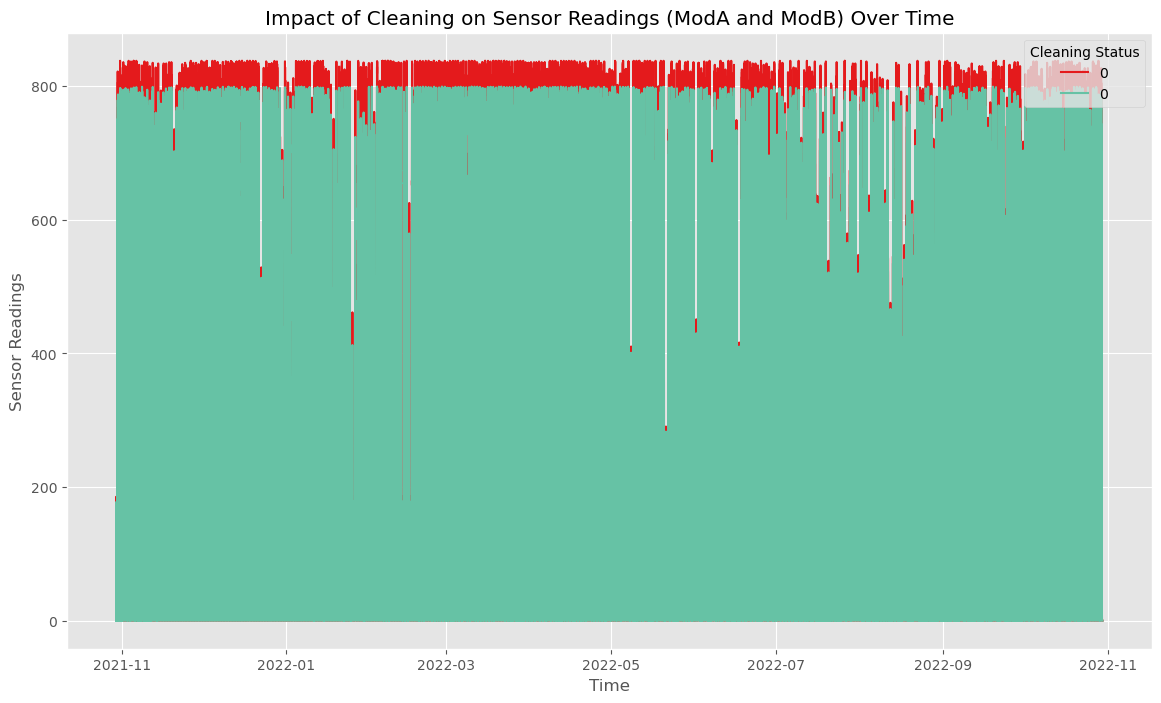

In [66]:
# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Plot ModA and ModB sensor readings over time, colored by the 'Cleaning' column
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette='Set1', linewidth=1.5)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette='Set2', linewidth=1.5)

# Add titles and labels
plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(title='Cleaning Status')
plt.grid(True)

# Show the plot
plt.show()

### Correlational analysis

The next line of code conducts a correlational analysis by using heatmaps and pairplots in order to visualize the correaltion between key metrics in the solar radiation side(GHI, DNI , DHI) and temprature side(TModA and TModB).
It also further investigates the relationship between wind conditions(WS, WSgust, WD) and solar irradiance using scatter matrices.

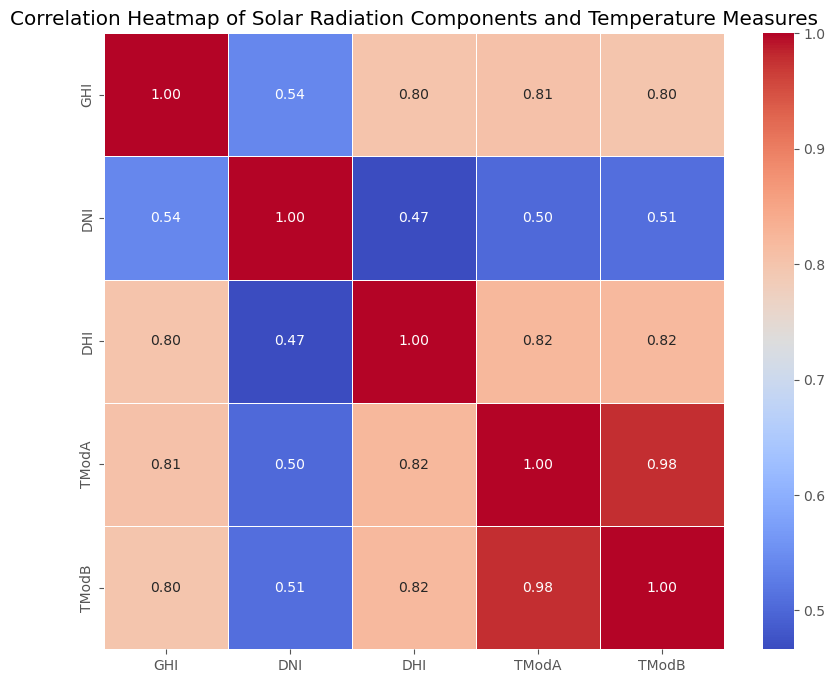

C:\Users\Beab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


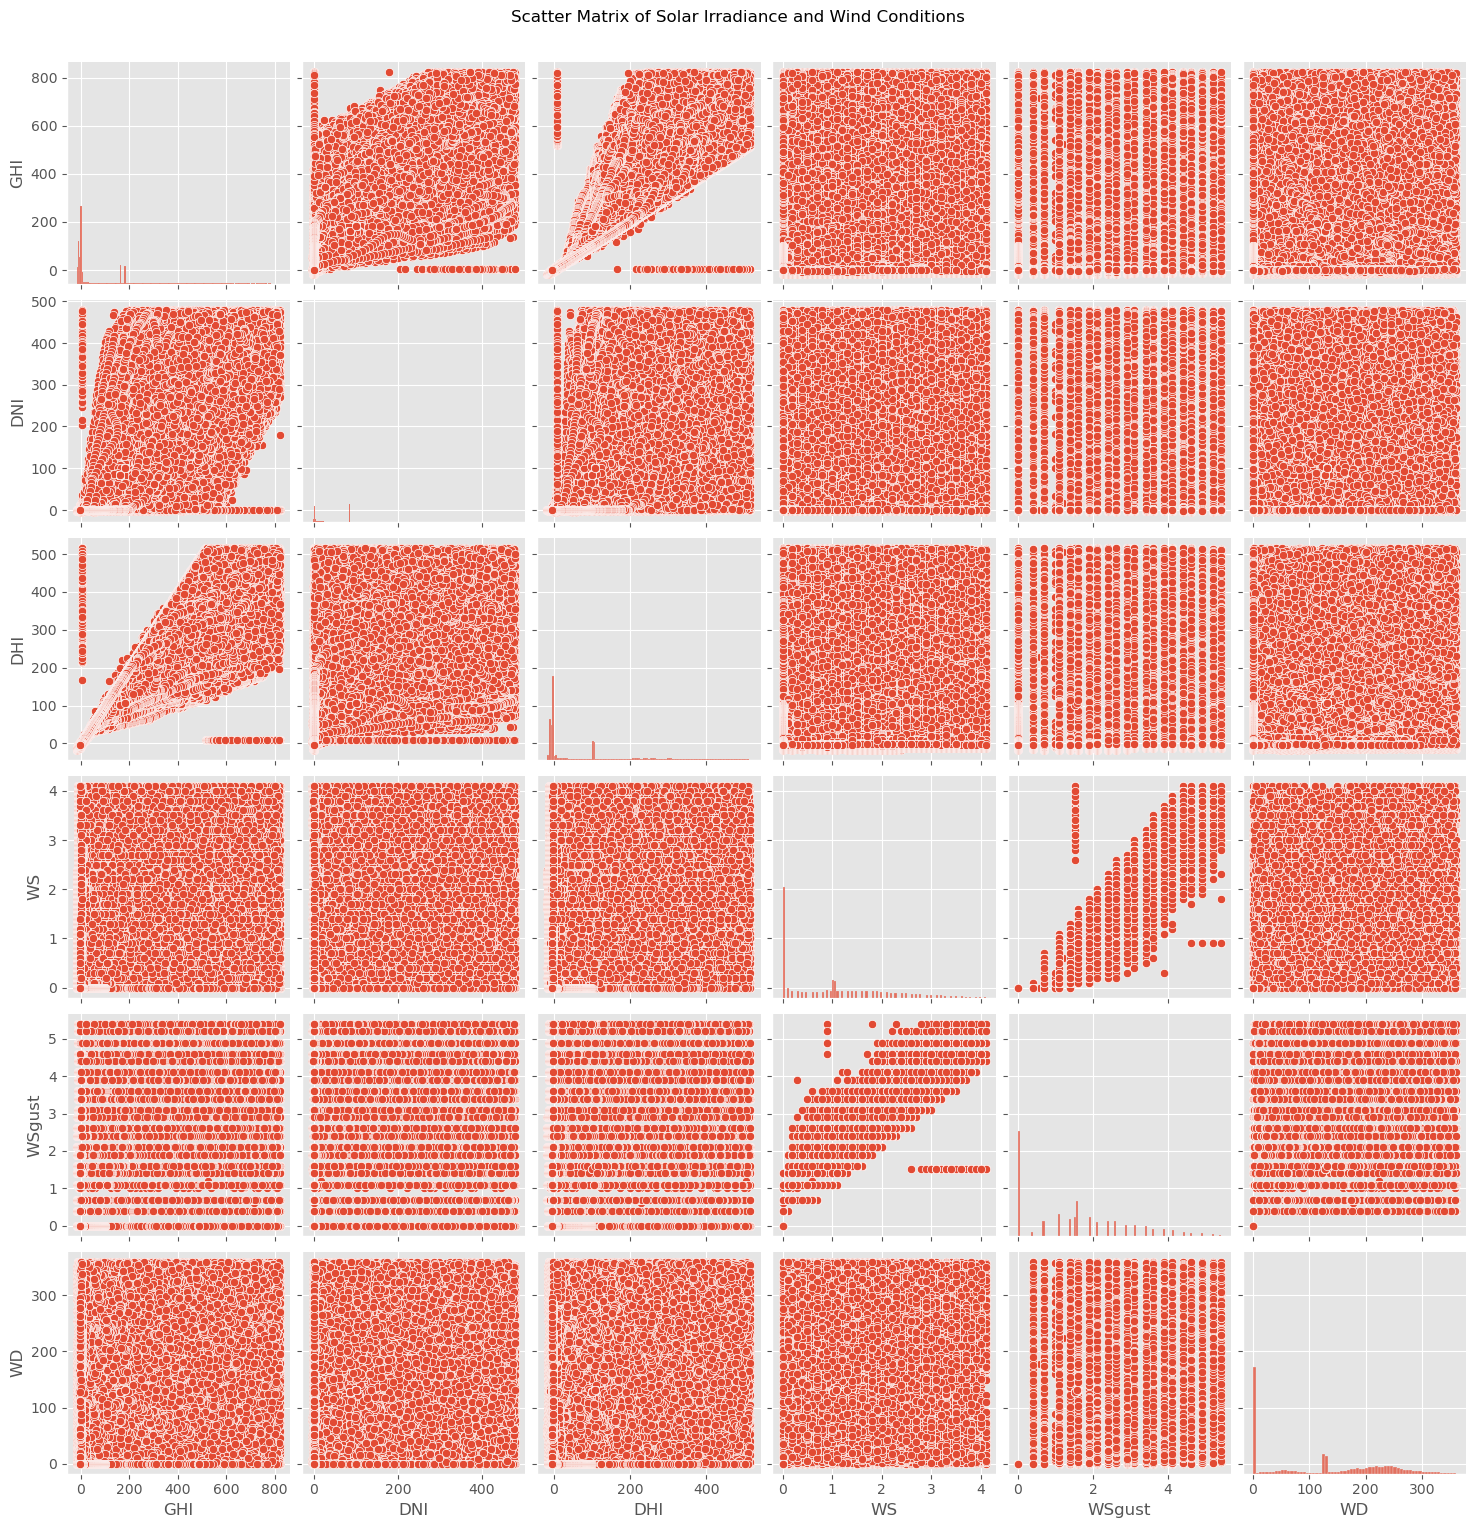

In [67]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Correlation Analysis
# Select relevant columns for correlation analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df[corr_columns]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation Components and Temperature Measures')
plt.show()

# Scatter Matrix Analysis
# Select columns for scatter matrix analysis
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_data = df[scatter_columns]

# Plot scatter matrix (pairplot) to investigate relationships
sns.pairplot(scatter_data)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()


### Wind analysis

The following code investigates the trends and significant wind event by showcasing the distribution of wind speed, direction, and variability of wind direction. It utilizes olar plots to show the trends.

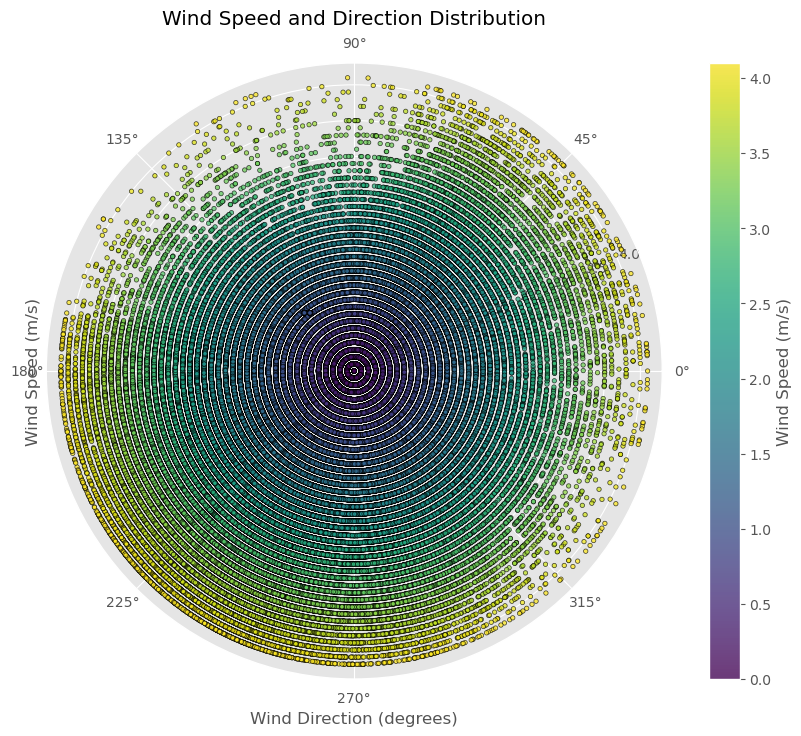

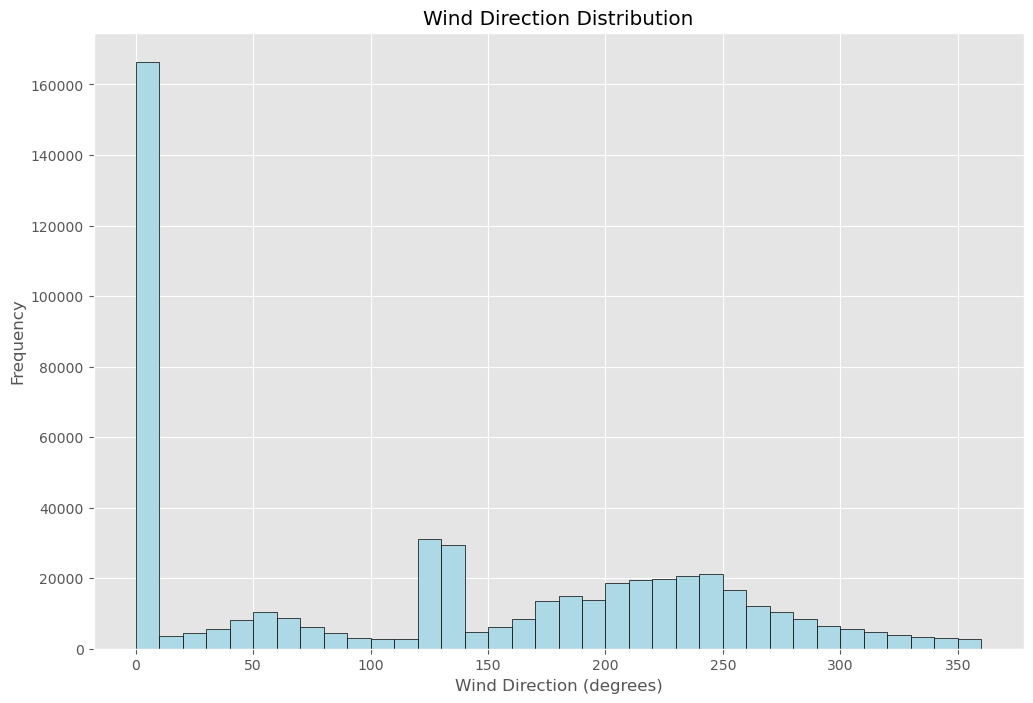

In [68]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['WS', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Convert wind direction to radians for polar plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Plotting Wind Speed vs. Wind Direction (Polar Plot)
plt.figure(figsize=(12, 8))

# Create polar plot for wind speed distribution
ax = plt.subplot(1, 1, 1, projection='polar')
c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', s=10, alpha=0.75, edgecolors='k', linewidth=0.5)

# Add color bar
plt.colorbar(c, ax=ax, label='Wind Speed (m/s)')

# Customize plot
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed (m/s)')

plt.show()

# Plotting Wind Direction Variability
plt.figure(figsize=(12, 8))

# Create a histogram for wind direction to analyze variability
plt.hist(df['WD'], bins=36, edgecolor='black', color='lightblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


### Temprature analysis

Below an analysis of how relative humidity(RH) influences temprature readings and solar radiation is conducted. It is conducted by the use of scatter plots and heatmaps.

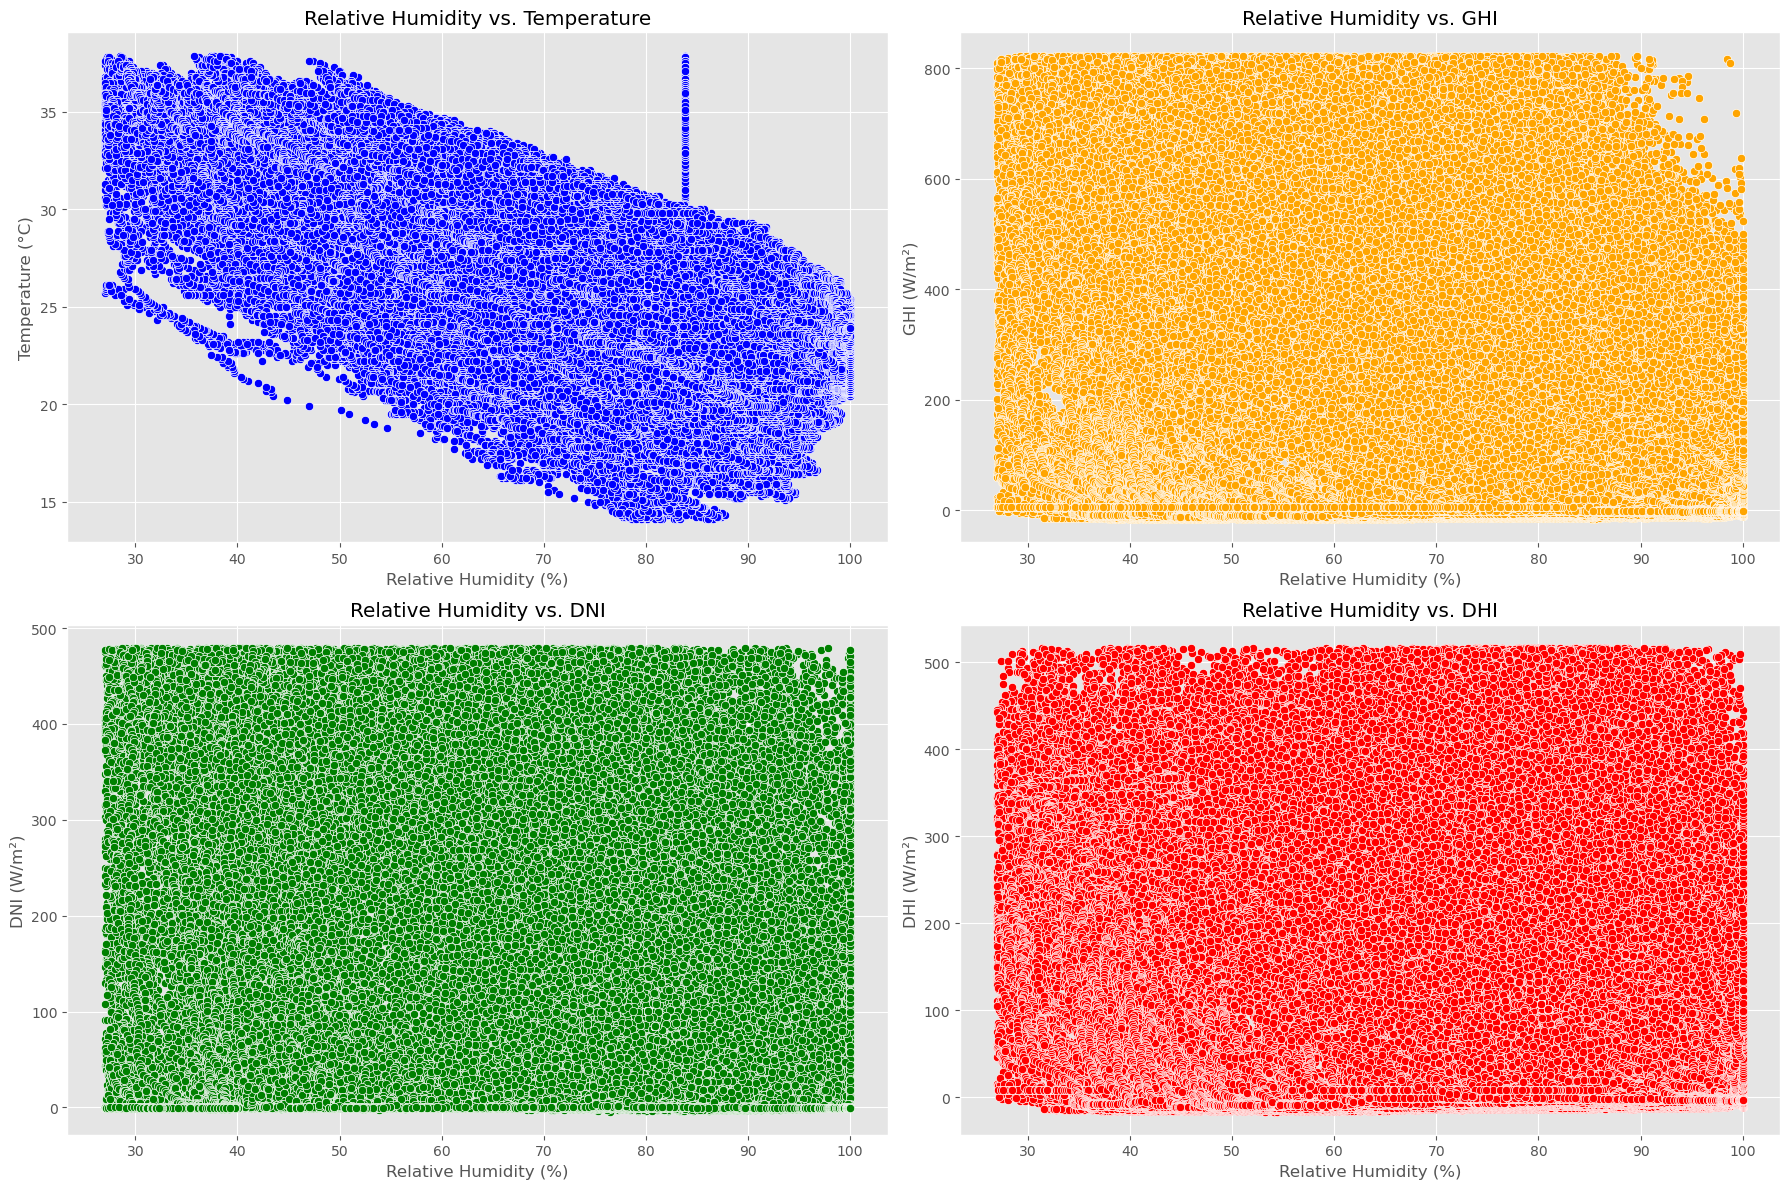

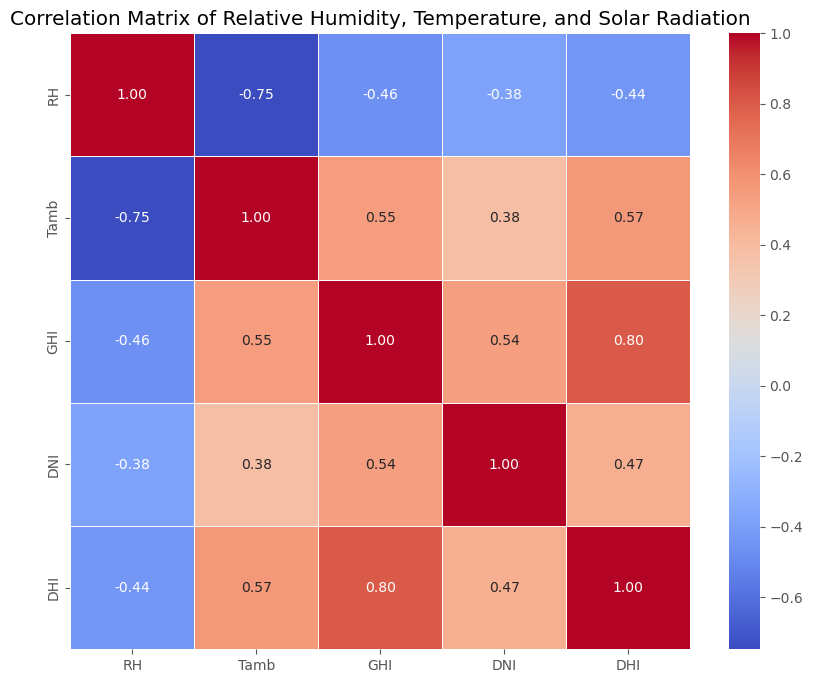

In [69]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Scatter plot for RH vs. Temperature (Tamb)
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Scatter plot for RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 3)
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Relative Humidity vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 4)
sns.scatterplot(x='RH', y='DHI', data=df, color='red')
plt.title('Relative Humidity vs. DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Correlation matrix for RH, Temperature, and Solar Radiation
correlation_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Relative Humidity, Temperature, and Solar Radiation')
plt.show()


### Histograms

The code below visualizes the frequency distribution of key metrics like GHI, DNi, DHI, WS and tempratures by the use of histograms.

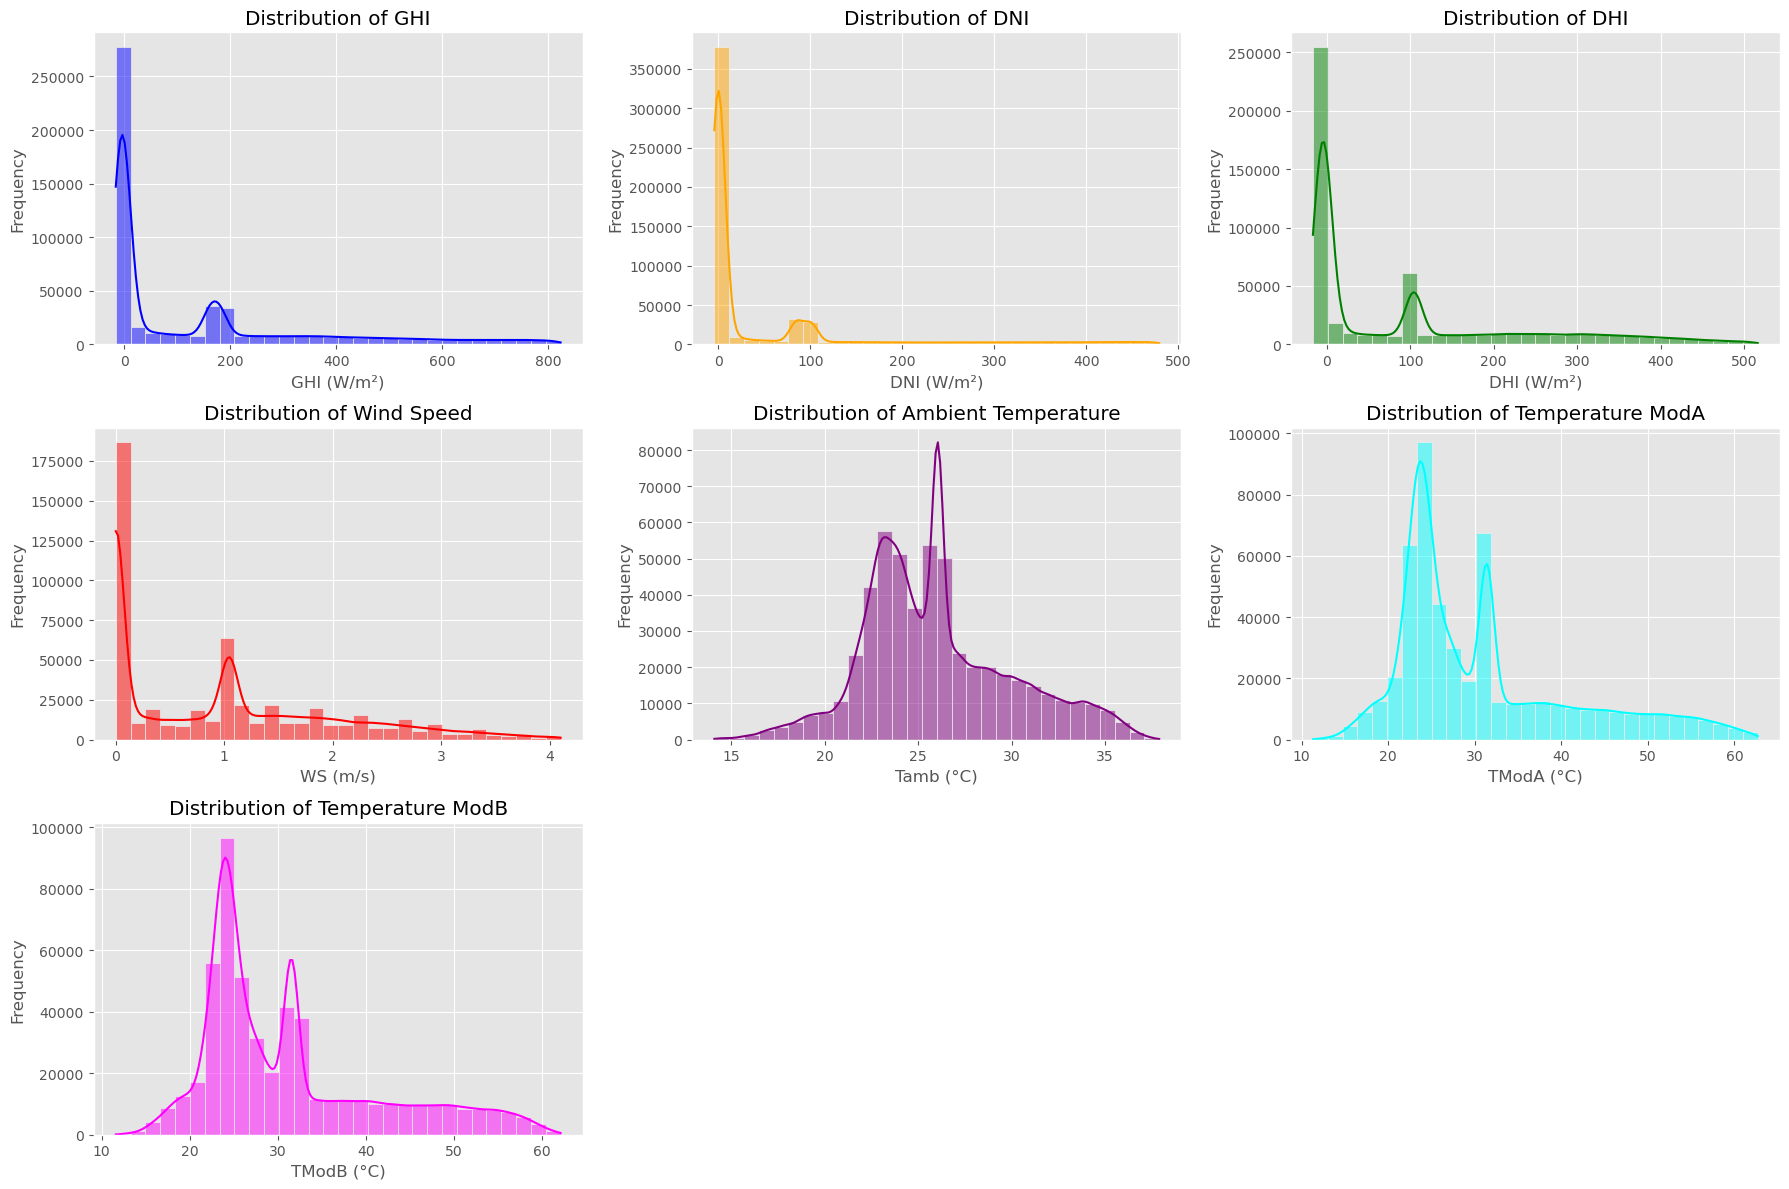

In [70]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Histogram for GHI (Global Horizontal Irradiance)
plt.subplot(3, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='blue')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DNI (Direct Normal Irradiance)
plt.subplot(3, 3, 2)
sns.histplot(df['DNI'], bins=30, kde=True, color='orange')
plt.title('Distribution of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI (Diffuse Horizontal Irradiance)
plt.subplot(3, 3, 3)
sns.histplot(df['DHI'], bins=30, kde=True, color='green')
plt.title('Distribution of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(3, 3, 4)
sns.histplot(df['WS'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

# Histogram for Tamb (Ambient Temperature)
plt.subplot(3, 3, 5)
sns.histplot(df['Tamb'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Tamb (°C)')
plt.ylabel('Frequency')

# Histogram for TModA (Temperature Sensor A)
plt.subplot(3, 3, 6)
sns.histplot(df['TModA'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Temperature ModA')
plt.xlabel('TModA (°C)')
plt.ylabel('Frequency')

# Histogram for TModB (Temperature Sensor B)
plt.subplot(3, 3, 7)
sns.histplot(df['TModB'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Temperature ModB')
plt.xlabel('TModB (°C)')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Bubble charts

In the code below, an attempt is made to show the complex relationships between variables, such as GHI vs Tamb vs WS, where the Bubble sizes also represent an additional variable liek RH or Baro metric pressure

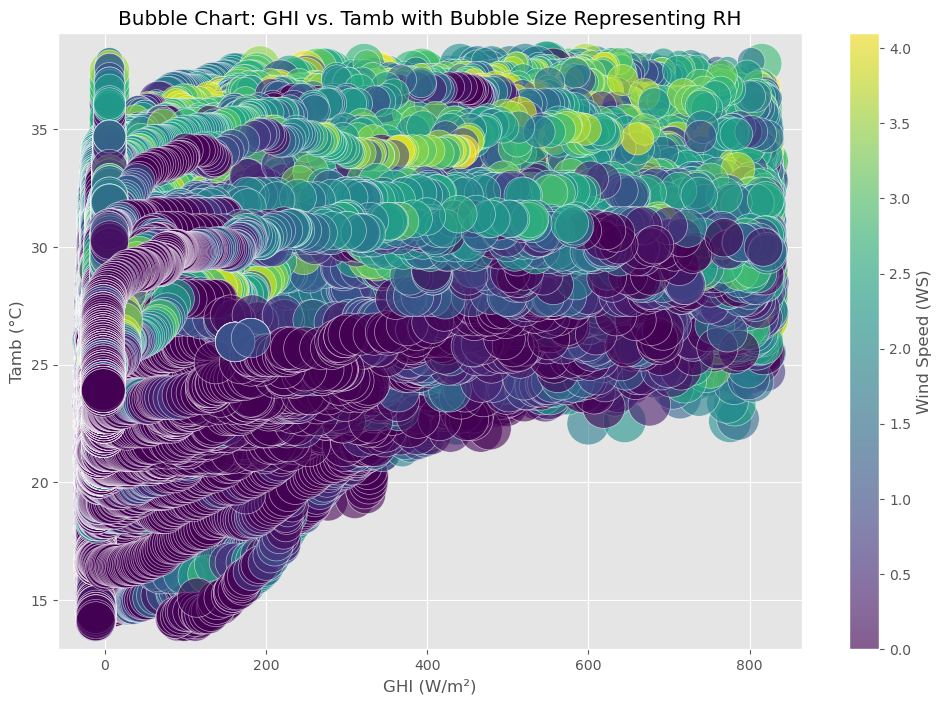

In [71]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'Tamb', 'WS', 'RH']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Plot Bubble Chart
plt.figure(figsize=(12, 8))

# Scatter plot for GHI vs. Tamb with bubble size representing RH
plt.scatter(
    x=df['GHI'],              # X-axis: GHI (Global Horizontal Irradiance)
    y=df['Tamb'],             # Y-axis: Tamb (Ambient Temperature)
    s=df['RH'] * 10,          # Bubble size: RH (Relative Humidity) scaled for visibility
    c=df['WS'],               # Color by WS (Wind Speed)
    cmap='viridis',           # Colormap for Wind Speed
    alpha=0.6,                # Transparency level of bubbles
    edgecolors='w',           # White edge color for bubbles
    linewidth=0.5             # Edge line width
)

# Add color bar to indicate Wind Speed
plt.colorbar(label='Wind Speed (WS)')

# Add titles and labels
plt.title('Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')

# Show plot
plt.grid(True)
plt.show()
